1) A high pass filter of 0.3Hz, a low pass filter of 100Hz and notch filters of 60Hz will be used

2) data will then be downsampled to 250 Hz, referenced to Fz.

3) Noisy channels would be replaced via interpolation from neighboring electrodes

4) Data would be referenced to average and epiched to 4 second sections.

5) An Independent Component Analysis (ICA) would be then performed and the components representing an artifact would be subtracted.

6) We will visually inspect the data to assure artifact free data. 

### Imports

In [44]:
import mne
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib qt

import warnings
warnings.filterwarnings("ignore")

Channels marked as bad: none


### Load data

In [49]:
root = Path("/Users/pstetz/Desktop/eeg")
eeg = mne.io.cnt.read_raw_cnt(root / "patrick" / "testid_patient_2021-05-24_13-00-31.cnt", preload=True)
# eeg = mne.io.cnt.read_raw_cnt(root / "chauncey" / "11111_TMSEEG_2021-07-12_10-40-48.cnt", preload=True)
eeg.crop(tmin=10);

Reading 0 ... 445758  =      0.000 ...   222.879 secs...


### Preprocess

In [50]:
def preprocess(eeg):
    tmp = eeg.copy().filter(2, 100)
    tmp = tmp.notch_filter([60])
    tmp = tmp.resample(500)
    tmp = tmp.set_eeg_reference(ref_channels="average")
    return tmp

peeg = preprocess(eeg)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 3301 samples (1.651 sec)

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandw

### Create Epochs

2 second duration

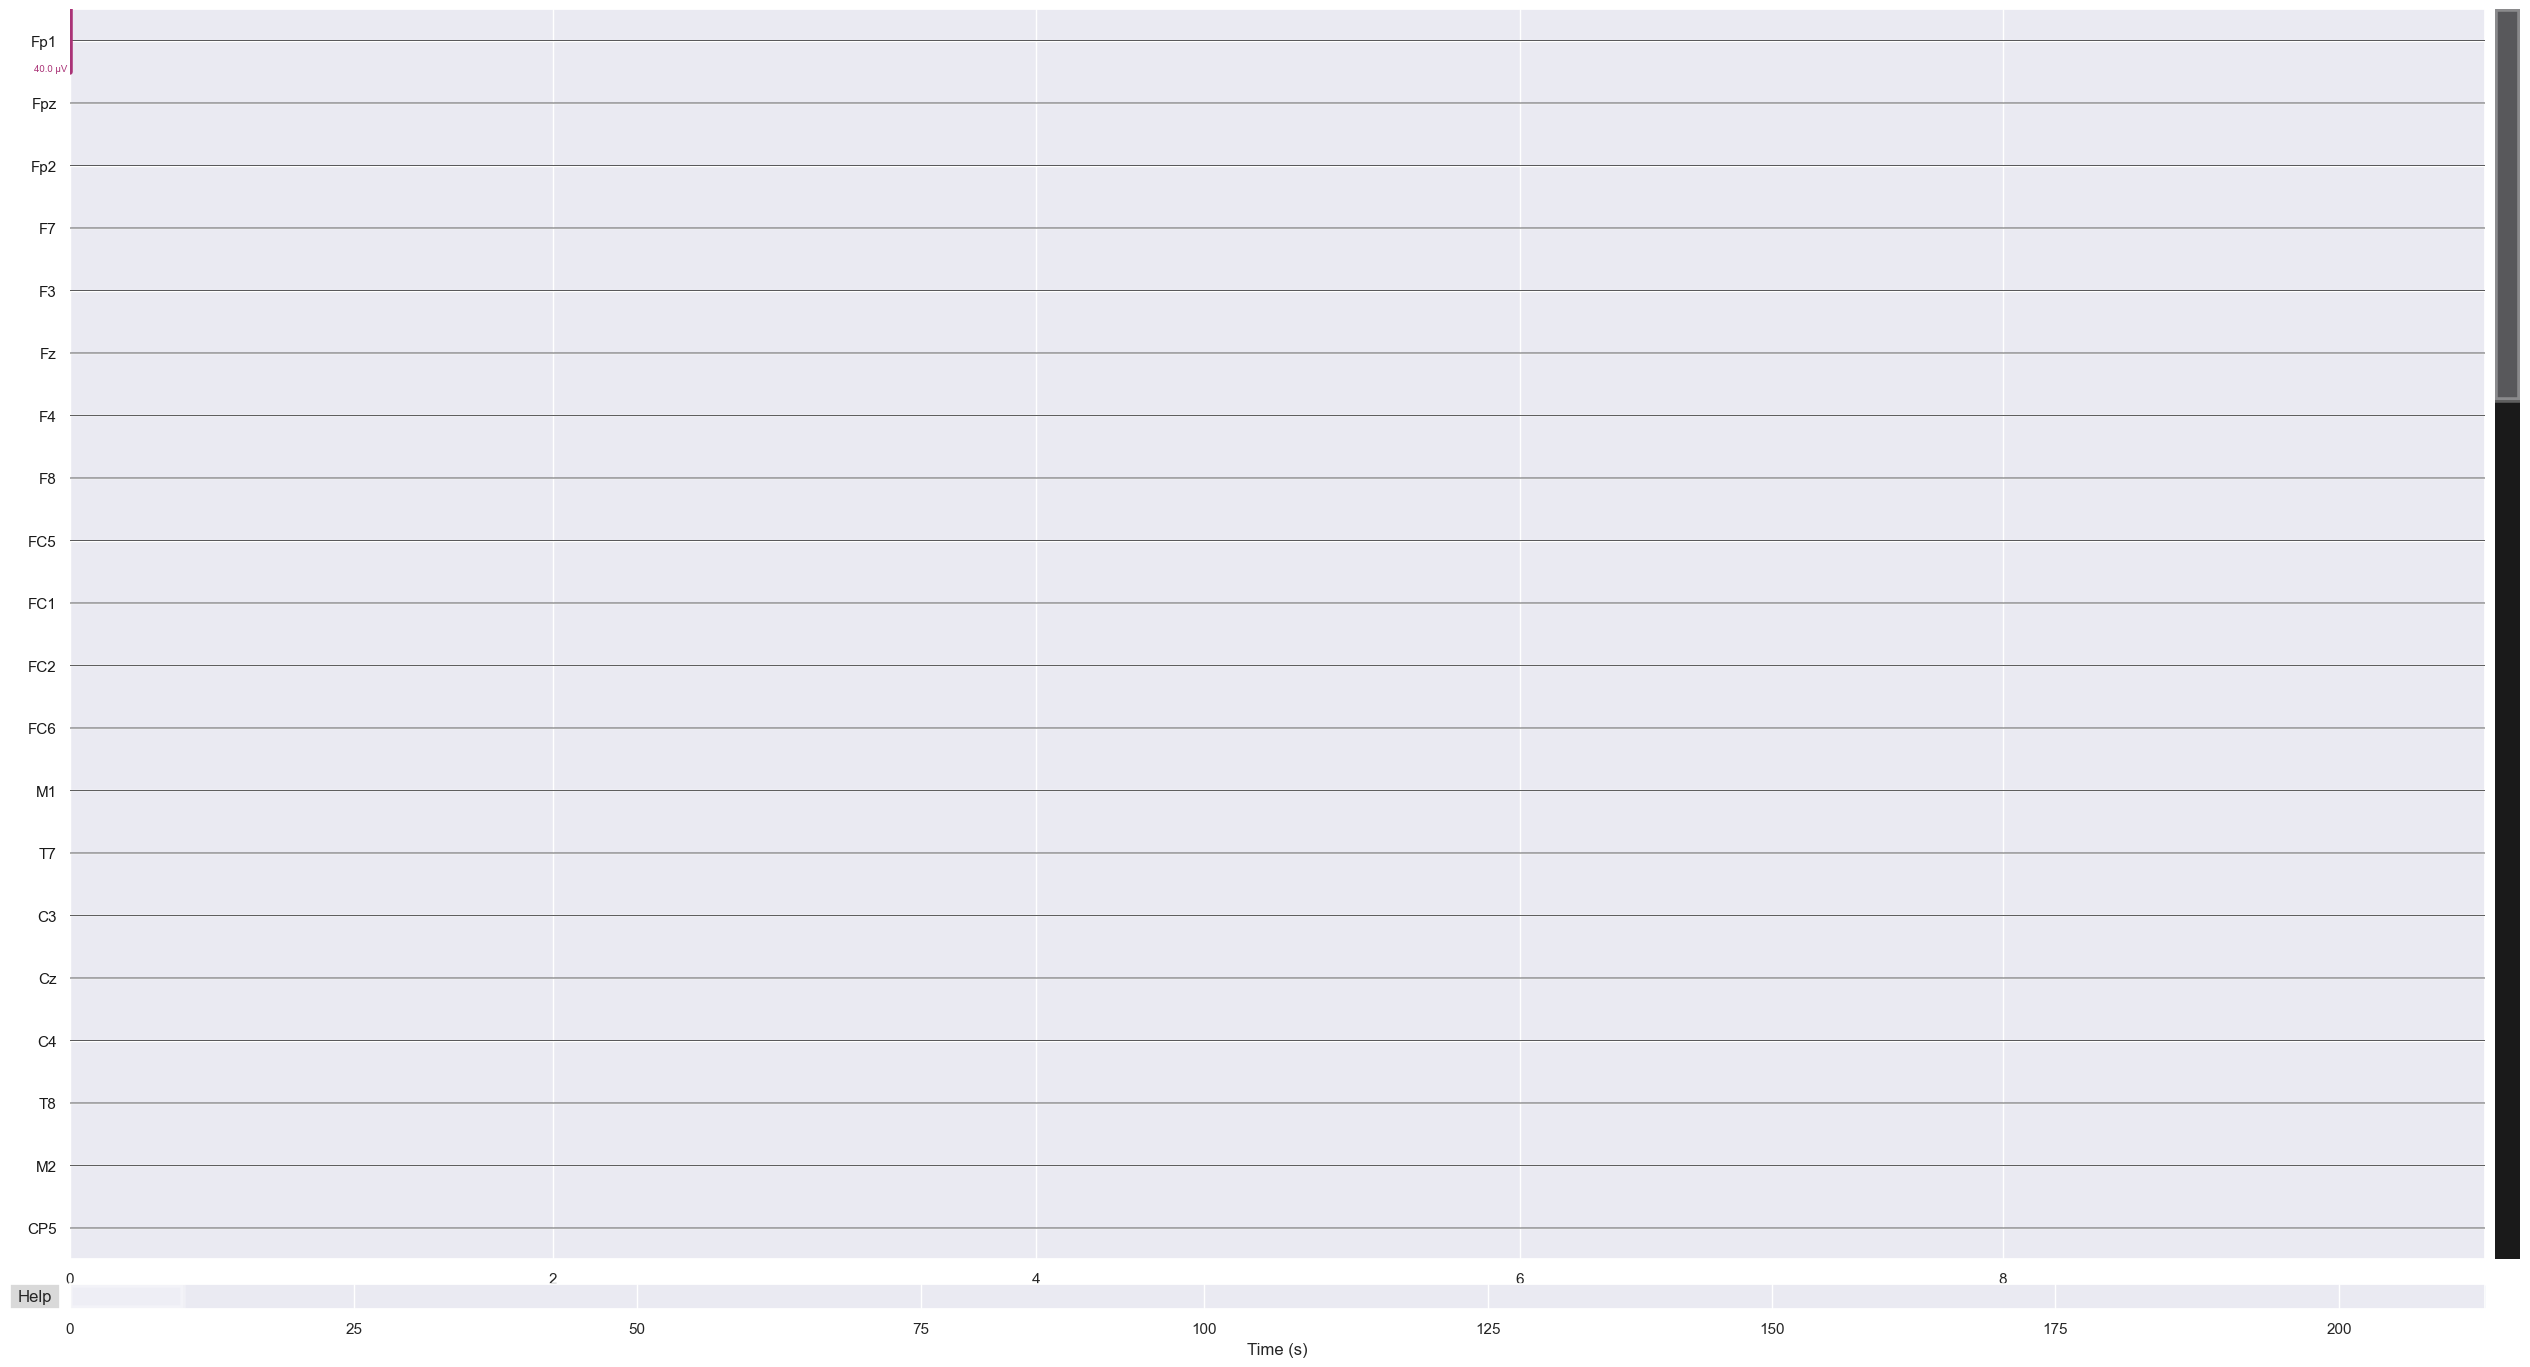

Channels marked as bad: none
Channels marked as bad: ['P1', 'P2', 'P6', 'P5', 'PO5', 'PO3']


In [51]:
peeg.plot()

In [42]:
mne.preprocessing.find_bad_channels_maxwell(peeg)

Applying low-pass filter with 40.0 Hz cutoff frequency ...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 83 samples (0.332 sec)

Scanning for bad channels in 123 intervals (5.0 sec) ...


ValueError: No channels match the selection.

In [5]:
epochs = mne.make_fixed_length_epochs(peeg, duration=2, preload=True)

Not setting metadata
Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
Loading data for 106 events and 500 original time points ...
0 bad epochs dropped


### ICA

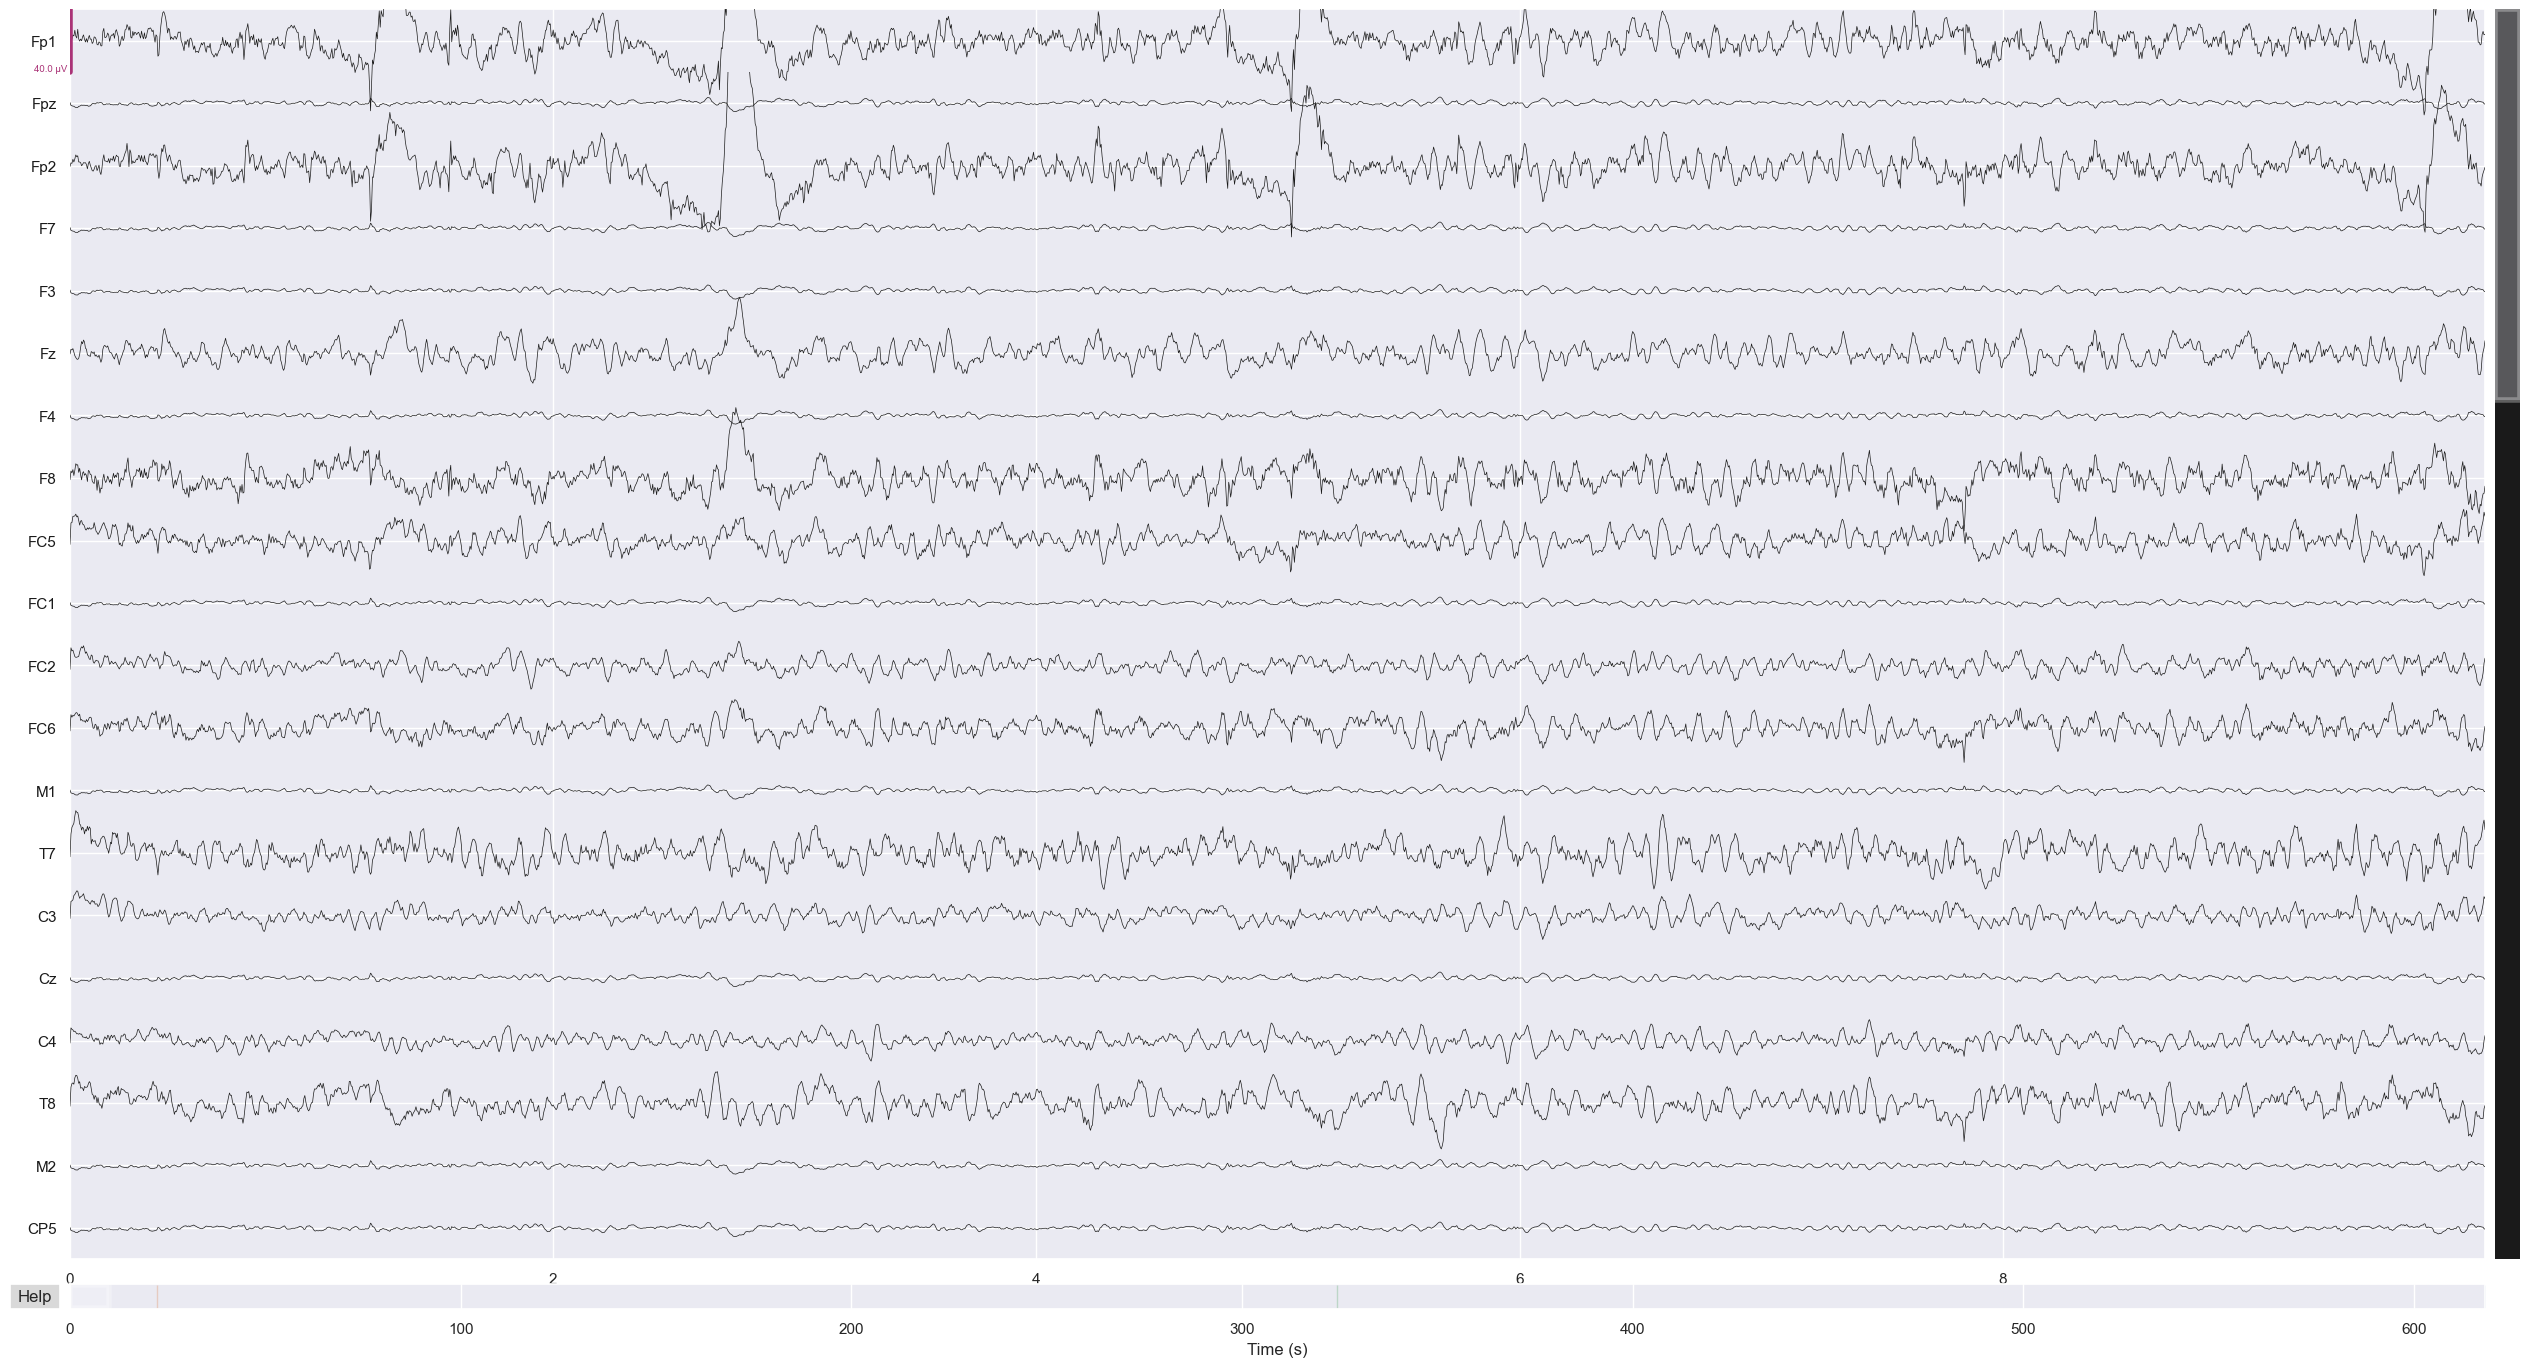

In [48]:
peeg.plot()

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 2.8s.
Creating RawArray with float64 data, n_channels=20, n_times=154540
    Range : 2500 ... 157039 =     10.000 ...   628.156 secs
Ready.


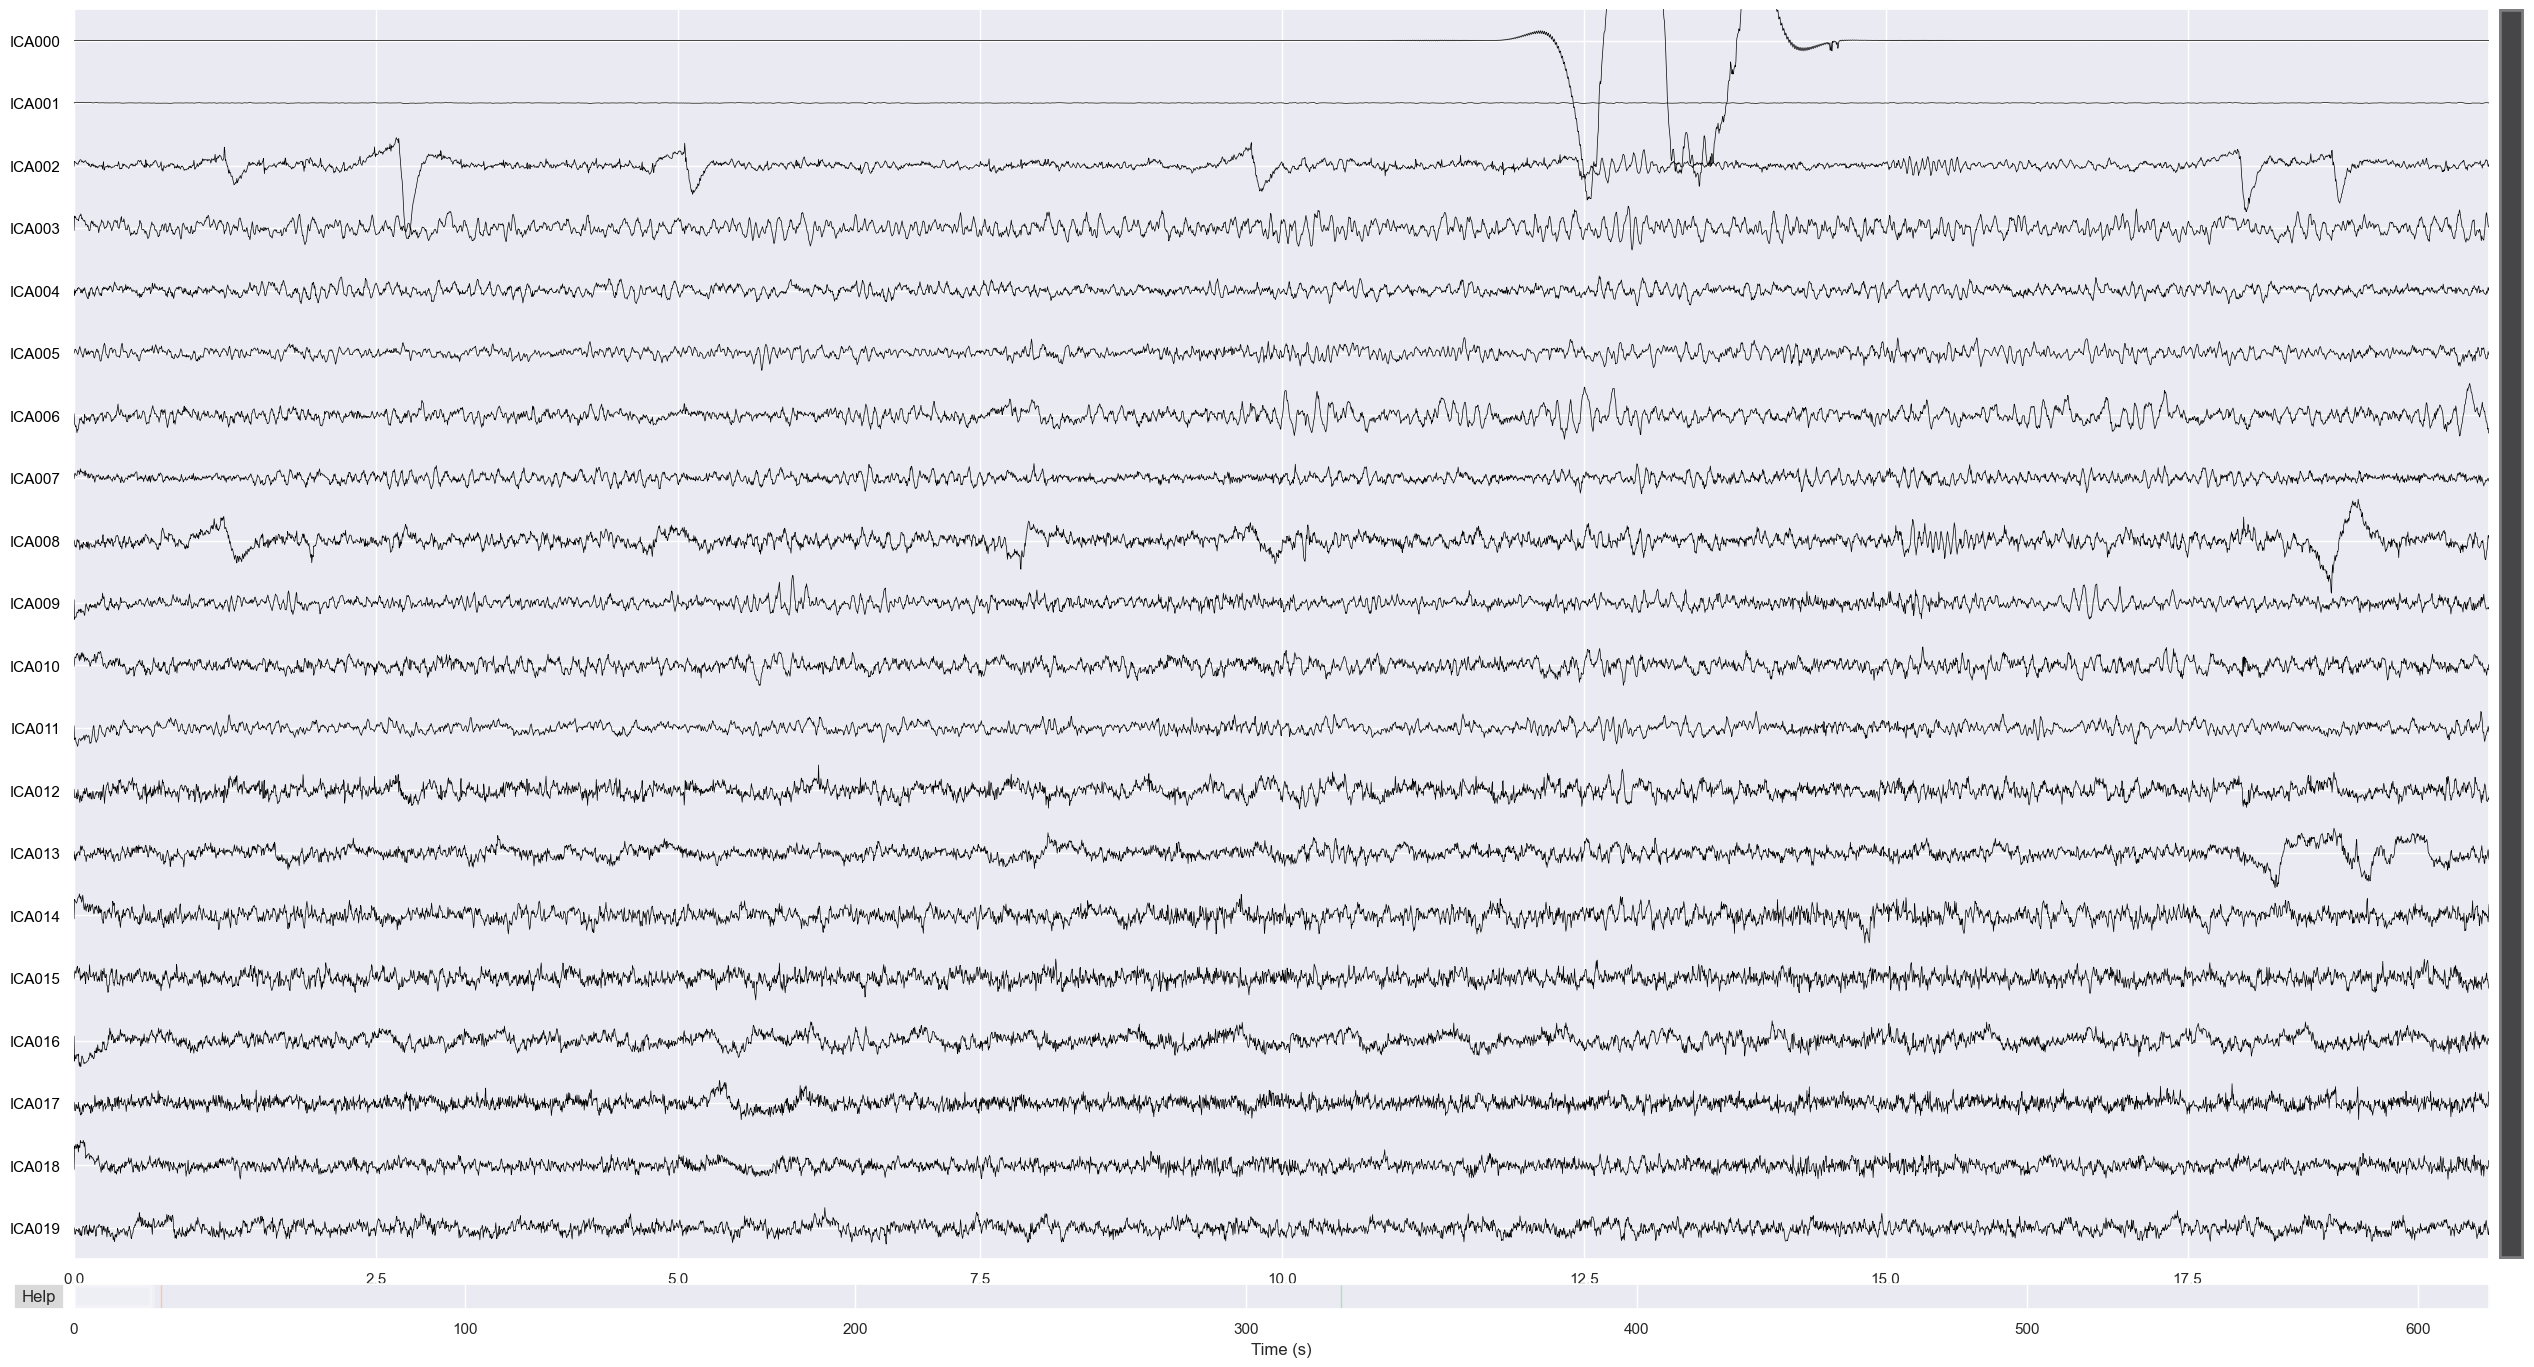

In [47]:
ica = mne.preprocessing.ICA(n_components=20, max_iter="auto", random_state=97)
ica.fit(peeg)
ica.plot_sources(peeg, show_scrollbars=True)